In [22]:
import os
import json
import math
import numpy as np
import pandas as pd

In [2]:
import sys
sys.path.insert(0, '/home/rparulkar/libs/data-collection/api')
import api as five3api

In [3]:
SOURCEDIR = 'source-data/'
OUTDIR = 'processed-data/'

In [4]:
drug_mapping_inf = os.path.join(OUTDIR, 'drugs.json')
drug_mapping = json.load(open(drug_mapping_inf))
doxo_patients = [x for x in drug_mapping[0].keys() if 'Doxorubicin' in drug_mapping[0][x]['drugs']]
print len(doxo_patients)

605


In [14]:
response_data_inf = os.path.join(OUTDIR, '20180823_release_12.0.tsv')
response_df = pd.read_csv(response_data_inf, sep='\t', dtype=str)
response_df

,uuid,barcode,age,gender,tissue,project,race,collection_type,vital_status,os_censored,os_time
0,5f10f8e4-a6f9-4643-b210-390bc8fd32bd,TCGA-AF-4110,77,MALE,NaN,Rectum adenocarcinoma,WHITE,prospective,Alive,True,912
1,7b982d5e-3a7d-40ac-bd25-6044c62879b6,TCGA-68-8250,66,MALE,Lung,Lung squamous cell carcinoma,BLACK OR AFRICAN AMERICAN,retrospective,Alive,True,244
2,38dd826d-06dc-4a73-b852-c3d78c9c3ff4,TCGA-14-1821,31,MALE,Brain,Glioblastoma multiforme,WHITE,NaN,Dead,False,541
3,FF5B9238-38A7-42B4-9D44-3B8EC9913F6D,TCGA-GU-A42P,72,MALE,Bladder,Bladder Urothelial Carcinoma,WHITE,prospective,Dead,False,332
4,eff7f13b-ed32-4e85-a8d0-831b655d773f,TCGA-14-0812,65,MALE,Brain,Glioblastoma multiforme,WHITE,NaN,Dead,False,99
5,32128246-1258-43d1-b1e5-30ae63822c32,TCGA-CV-6950,64,MALE,Head and Neck,Head and Neck squamous cell carcinoma,WHITE,retrospective,Dead,False,459
6,33C09CD7-2CCC-4A69-B738-79DFD9AA149D,TCGA-5P-A9KE,70,MALE,Kidney,Kidney renal papillary cell carcinoma,WHITE,retrospective,Alive,True,824
7,79fd602b-3e8e-4353-aa78-4f5f170b607d,TCGA-25-1328,38,FEMALE,Ovary,Ovarian serous cystadenocarcinoma,WHITE,NaN,Dead,False,2009
8,5AF0E222-3DC8-400B-BA61-2225921F2FD3,TCGA-L5-A8NH,54,MALE,Esophagus,Esophageal carcinoma,WHITE,retrospective,Dead,False,393
9,c75c915f-ef4b-4c19-8ace-995e6c6015fd,TCGA-04-1638,57,FEMALE,Ovary,Ovarian serous cystadenocarcinoma,BLACK OR AFRICAN AMERICAN,NaN,Dead,False,1686


In [18]:
doxo_response_df = response_df[response_df['uuid'].isin(doxo_patients)]
doxo_response_df['age'] = doxo_response_df['age'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
doxo_response_df['os_time'] = doxo_response_df['os_time'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
doxo_response_df['os_time_years'] = doxo_response_df['os_time'] / 365.
doxo_response_df['os_time_years'] = doxo_response_df['os_time_years'].round(decimals=2)
print doxo_response_df.shape

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

(605, 12)


In [19]:
doxo_response_df.head(n=5)

,uuid,barcode,age,gender,tissue,project,race,collection_type,vital_status,os_censored,os_time,os_time_years
9,c75c915f-ef4b-4c19-8ace-995e6c6015fd,TCGA-04-1638,57,FEMALE,Ovary,Ovarian serous cystadenocarcinoma,BLACK OR AFRICAN AMERICAN,NaN,Dead,False,1686,4.62
34,09066fbf-6a1d-46c9-a4c5-c53340c3d1ba,TCGA-BS-A0TE,35,FEMALE,Endometrial,Uterine Corpus Endometrial Carcinoma,ASIAN,retrospective,Dead,False,146,0.40
38,e641aed9-1dd8-4c30-b231-f12b20a76df0,TCGA-10-0926,63,FEMALE,Ovary,Ovarian serous cystadenocarcinoma,WHITE,NaN,Dead,False,788,2.16
40,9370e189-8fb7-4bfa-8ef9-2220f3557188,TCGA-EY-A1GO,65,FEMALE,Endometrial,Uterine Corpus Endometrial Carcinoma,WHITE,prospective,Alive,True,586,1.61
65,71fed998-8fac-4e6b-b38a-22c83e05e958,TCGA-A5-A0GA,67,FEMALE,Endometrial,Uterine Corpus Endometrial Carcinoma,WHITE,retrospective,Dead,False,543,1.49


# Attempt to categorize combination vs not

In [78]:
for uuid in drug_mapping[0].keys():
    if uuid not in doxo_response_df['uuid'].unique():
        continue
    txs = drug_mapping[0][uuid]['drugs']
    if len(list(set(txs))) == 1:
        print uuid

8488BB97-BF11-45CC-B1BD-52969598448D
A5406575-C840-475A-AB1B-E1A159413FBD
90BC0F31-0EC2-4CEB-AD99-6BE8F8B19180
306C53FB-640D-42AD-889A-ABC5FD3AD778
214a4507-d974-4b3e-8525-7408fccc6a0f
239505CE-F2F1-477E-8AE2-B7065989BA79
5A64F7E9-3833-4A3C-962B-13EB3E305C69
4E8C570C-3CBE-4878-8B2C-B966868DD60D
A34CFB9C-44DD-4617-BBD1-28EDC8D527C4
2ee36d9d-128b-4761-aa1a-a637da106f3d
2C9F737B-0D37-4931-AFF5-4562A0057BAE
9C58E3B2-1DEE-4375-8239-CE69A725E3DE
7F9031DA-124A-4A38-83E6-878A50E58C24
4482DA24-BD16-4826-A9EA-1078BCB12411
2C9E8686-9757-4E05-8D0E-EFEAA3045D66
07a859fc-6f78-4905-9035-90e2403dbe8d


In [77]:
drug_mapping[0]['07a859fc-6f78-4905-9035-90e2403dbe8d']

{u'drugs': [u'Doxorubicin']}

## Plot project counts

In [39]:
import seaborn as sns
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import colors as mplcolors
%matplotlib inline

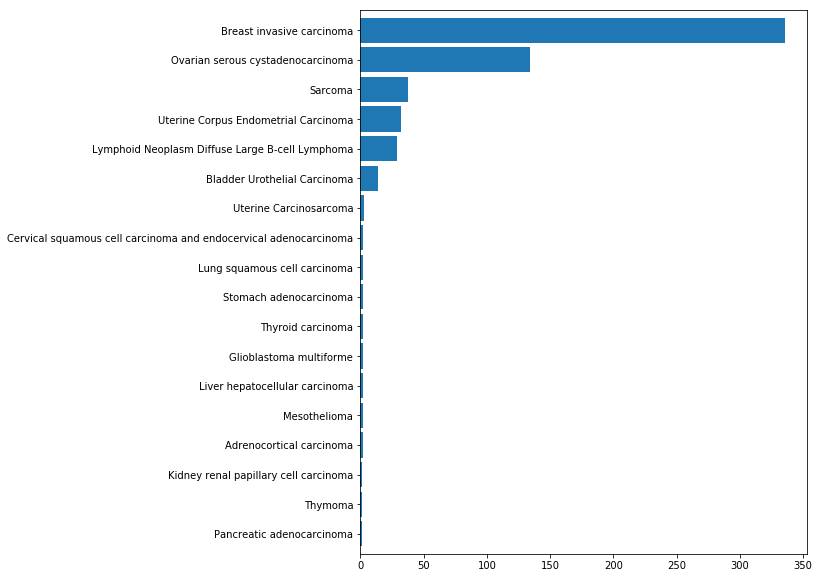

In [10]:
x = doxo_response_df['project'].value_counts()
ax = x.plot(kind='barh', figsize=(8, 10), zorder=2, width=0.85)
ax.invert_yaxis()

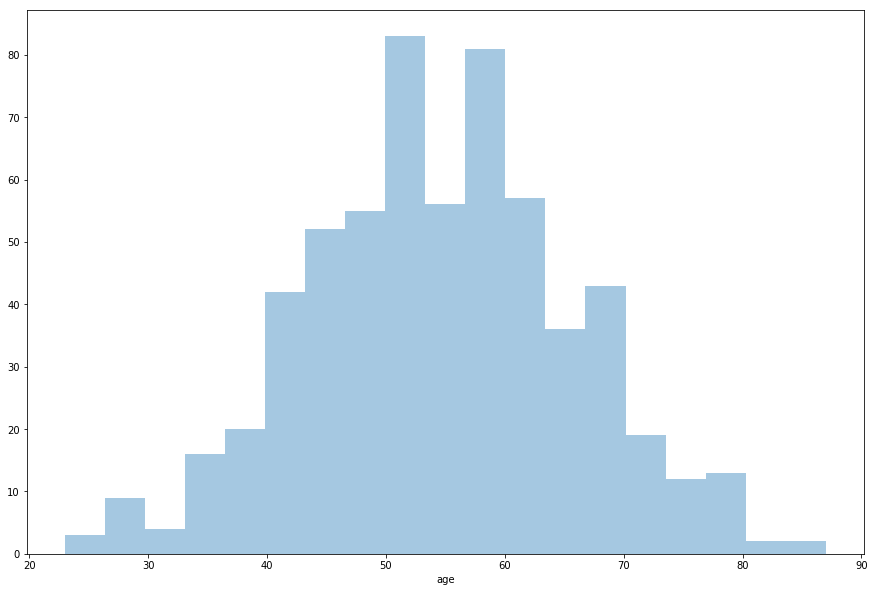

In [48]:
plt.figure(figsize=(15,10))
sns.distplot(doxo_response_df['age'], kde=False)

In [12]:
def get_os_estimate(df):
    timepoints = [0] + sorted(df['os_time_years'].unique())
    cum_prob = 1

    h_ints = []
    h_mags = []

    v_ints = []
    v_mags = []

    r = df.shape[0]

    index = 0
    end_index = len(timepoints) - 1
    while index < end_index:
        start = timepoints[index]
        end = timepoints[index + 1]

        c_dict = df[(df['os_time_years'] > start) &
                    (df['os_time_years'] <= end)]['os_censored'].value_counts()
        c = 0 if 'True' not in c_dict else c_dict['True']
        n = r-c
        d_dict = df[(df['os_time_years'] > start) &
                    (df['os_time_years'] <= end)]['vital_status'].value_counts()
        d = 0 if 'Dead' not in d_dict else d_dict['Dead']
        prob = ((n - d) / float(n)) * cum_prob
        v_int = (prob, cum_prob)
        v_ints.append(v_int)
        v_mag = start
        v_mags.append(v_mag)

        cum_prob = prob

        index += 1
        r = n-d

        h_int = (start, end)
        h_ints.append(h_int)
        h_mag = prob
        h_mags.append(h_mag)

    return h_ints, h_mags, v_ints, v_mags

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in divide


Thyroid carcinoma
Cervical squamous cell carcinoma and endocervical adenocarcinoma
Mesothelioma
Glioblastoma multiforme
Lung squamous cell carcinoma
Pancreatic adenocarcinoma
Adrenocortical carcinoma
Uterine Carcinosarcoma
Kidney renal papillary cell carcinoma
Thymoma
Stomach adenocarcinoma
Liver hepatocellular carcinoma


([<matplotlib.axis.XTick at 0x7f9d6399bf50>,
 <a list of 19 Text xticklabel objects>)

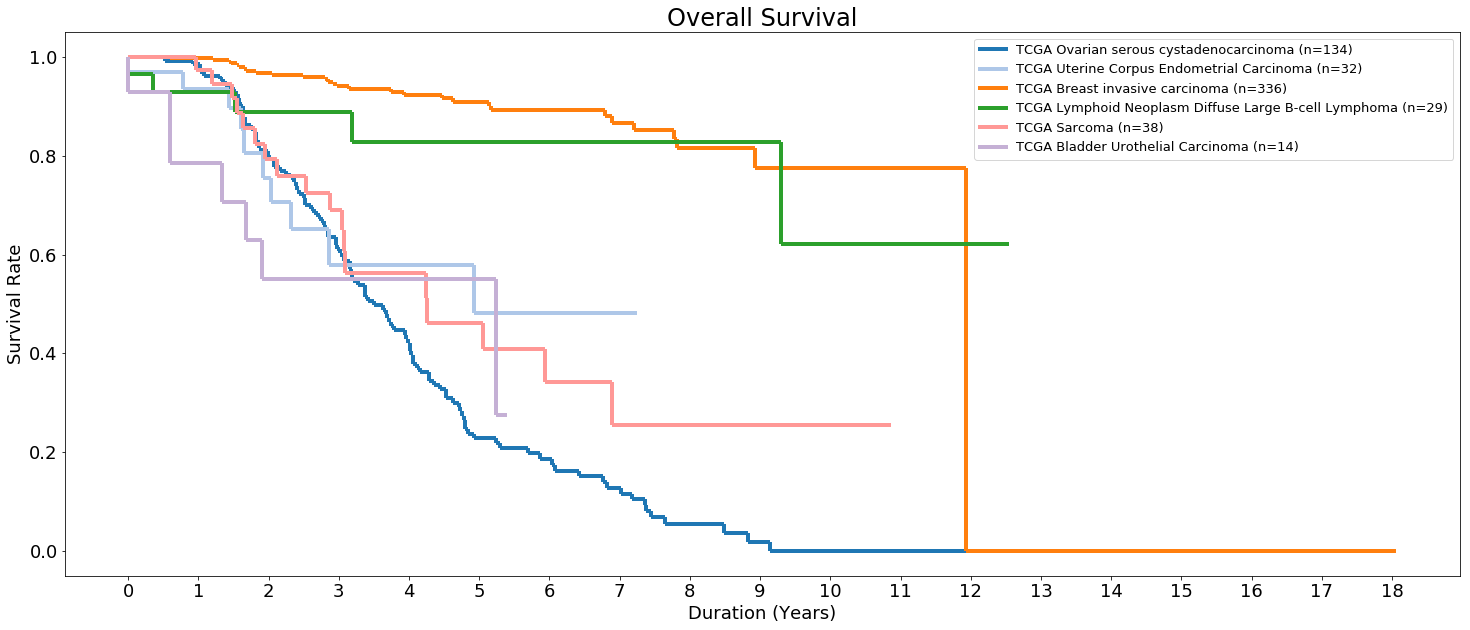

In [57]:
plt.figure(figsize=(25,10))

unique_projects = doxo_response_df['project'].unique()
color_palette = [ mplcolors.rgb2hex(cm.tab20(x)) for x in np.linspace(0, 1, len(unique_projects)) ]

max_duration = 0

labels = []
legend_labels = []
for project, color in zip(unique_projects, color_palette):
    doxo_project_df = doxo_response_df[(doxo_response_df['project'] == project) &
                                       (doxo_response_df['os_time'] > 0)]
    doxo_project_df.sort_values(by=['os_time_years'], inplace=True)
    if doxo_project_df.shape[0] < 10:
        print project
        continue
    
    
    project_max = max(doxo_project_df['os_time_years'])
    max_duration = project_max if project_max > max_duration else max_duration
    
    labels.append(project)
    legend_labels.append('TCGA {0} (n={1})'.format(project, doxo_project_df.shape[0]))

    h_ints, h_mags, v_ints, v_mags = get_os_estimate(doxo_project_df)
        
    for h_int, h_mag in zip(h_ints, h_mags):
        plt.hlines(h_mag, xmin=h_int[0], xmax=h_int[1],
                   lw=4, colors=color)
    for v_int, v_mag in zip(v_ints, v_mags):
        plt.vlines(v_mag, ymin=v_int[0], ymax=v_int[1],
                   lw=4, colors=color)
    
plt.title('Overall Survival', size=24)
plt.xlabel('Duration (Years)', size=18)
plt.ylabel('Survival Rate', size=18)
    
plt.tick_params(axis='both', which='major', labelsize=18)

lines = [Line2D([0],
                [0],
                color=c,
                linewidth=4,
                linestyle='-') for p, c in zip(unique_projects, color_palette) if p in labels]
plt.legend(lines,
           legend_labels, 
           prop={'size': 13})
plt.xticks(np.arange(0, math.ceil(max_duration), 1))

In [62]:
temp = doxo_response_df[(doxo_response_df['project'] == 'Breast invasive carcinoma') &
                        (doxo_response_df['os_time'] > 0)]
temp.sort_values(by='os_time_years', inplace=True)
temp

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,uuid,barcode,age,gender,tissue,project,race,collection_type,vital_status,os_censored,os_time,os_time_years
8621,a4c59287-1ad5-46a5-8040-e591e6ce064f,TCGA-E9-A244,54,FEMALE,Breast,Breast invasive carcinoma,WHITE,prospective,Alive,True,21,0.06
6478,539bbbed-43fb-4fef-9c67-6406f58b186a,TCGA-E9-A248,51,FEMALE,Breast,Breast invasive carcinoma,WHITE,prospective,Alive,True,59,0.16
904,602083f0-18d9-48b6-a529-31e165c54b37,TCGA-BH-A0HL,56,FEMALE,Breast,Breast invasive carcinoma,WHITE,retrospective,Alive,True,72,0.20
3397,8332806e-f547-4aae-89af-6d5bec831fd2,TCGA-BH-A0HO,48,FEMALE,Breast,Breast invasive carcinoma,WHITE,retrospective,Alive,True,76,0.21
10452,124B693C-77DC-4FA8-B703-54E8B5054A92,TCGA-HN-A2NL,56,FEMALE,Breast,Breast invasive carcinoma,NaN,retrospective,Alive,True,79,0.22
2806,a851ca14-7bbf-455b-a054-ec03979a4247,TCGA-BH-A0DQ,42,FEMALE,Breast,Breast invasive carcinoma,WHITE,retrospective,Alive,True,98,0.27
11014,20e8106b-1290-4735-abe4-7621e08e3dc8,TCGA-BH-A0E0,38,FEMALE,Breast,Breast invasive carcinoma,WHITE,retrospective,Alive,True,134,0.37
9698,c694615c-b1c6-499c-8058-995633ebf948,TCGA-E9-A1RF,68,FEMALE,Breast,Breast invasive carcinoma,WHITE,prospective,Alive,True,200,0.55
2917,fb3607eb-858e-4ecd-8477-95140658c6d2,TCGA-E9-A249,45,FEMALE,Breast,Breast invasive carcinoma,WHITE,prospective,Alive,True,217,0.59
10080,3E637872-F5E5-49D3-BB0D-9C16B8713382,TCGA-LL-A73Z,55,FEMALE,Breast,Breast invasive carcinoma,BLACK OR AFRICAN AMERICAN,prospective,Dead,False,227,0.62
